<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EB%B8%8C%EB%9E%9C%EB%93%9C%EC%84%A0%ED%83%9D_%EB%94%94%EC%8B%9C%EC%A0%84%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모형 개요
의사결정나무(decision tree)는 X변수를 사용한 여러 가지 규칙을 순차적으로 적용하여(*스무고개와 유사) y변수의 클래스를 분류하는 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 CART(Classification And Regression Tree)라고도 한다.


---


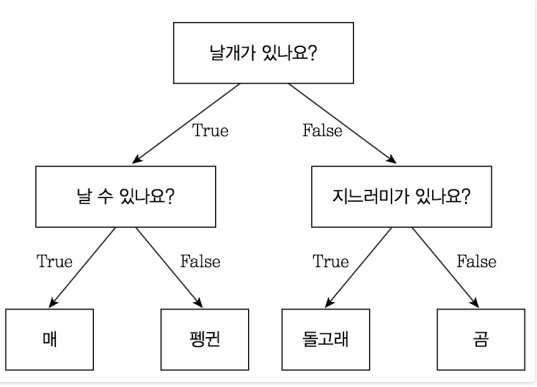


# 데이터 불러오기 
브랜드 선택 데이터를 사용한다. 우선 두 개의 특성변수(price_1, price_2)만을 사용하자. 


In [1]:

from sklearn.datasets import load_iris; import io; import pydot; from IPython.core.display import Image
from sklearn.tree import export_graphviz; import pandas as pd; import numpy as np; 
from sklearn.tree import DecisionTreeClassifier; from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report; import matplotlib.pyplot as plt 

## 데이터 불러오기  
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트
data = pd.read_csv('/content/public/choice500.csv')
print(data.head(10))

data = np.array(data); ncol=data.shape[1]; nrow=data.shape[0]

X=data[:,3:5]; y=data[:,ncol-1]-1;
feature_names = ['price_1', 'price_2']
class_names = ['nabisco', 'keebler', 'sunshine']    ## 브랜드 이름


Cloning into 'public'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 137 (delta 55), reused 50 (delta 15), pack-reused 0
Receiving objects: 100% (137/137), 4.87 MiB | 8.99 MiB/s, done.
Resolving deltas: 100% (55/55), done.
   age  male  heavy  price1  price2  price3  ...  ad2  ad3  disp1  disp2  disp3  buy
0   63     0      0    1.75    1.30    1.73  ...    1    1      0      1      1    2
1   29     1      1    1.65    1.43    1.66  ...    1    1      0      0      1    3
2   30     1      1    1.62    1.53    1.76  ...    0    0      1      0      0    1
3   53     1      1    1.52    1.53    1.76  ...    0    1      1      1      1    3
4   55     0      0    1.83    1.62    1.67  ...    0    1      0      0      0    3
5   57     0      0    1.86    1.63    1.72  ...    0    0      0      1      1    1
6   31     0      1    1.64    1.85    1.62  ...    0    1      1      1 

# 데이터를 training과 test set으로 나누기

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

# 모형 설정
‘max_depth’로 분류질문의 수를 제한한다. ‘entrophy’는 분류문제에 적절히 설계된 loss 함수이다. 


---



결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다. 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않습니다. 이제 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막아보겠습니다. 한 가지 방법은 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것입니다. max_depth=5 옵션을 주면 연속된 질문을 최대 5개로 제한합니다. 트리 깊이를 제한하면 과대적합이 줄어듭니다. 이는 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선시킵니다.

In [3]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X_train, y_train)


print("훈련 세트 정확도: {:.3f}".format(model1.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model1.score(X_test, y_test)))

훈련 세트 정확도: 0.565
테스트 세트 정확도: 0.512


아래 코드는 tree 그림을 그리기 위해 필요한 모듈이다. 

In [0]:

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    return Z

# 디시전 트리를 그려보자
각 가지별 분류변수의 종류와 임계치는 손실함수인 엔트로피를 최소화하는 원리로 컴퓨터가 자동으로 결정한다.  


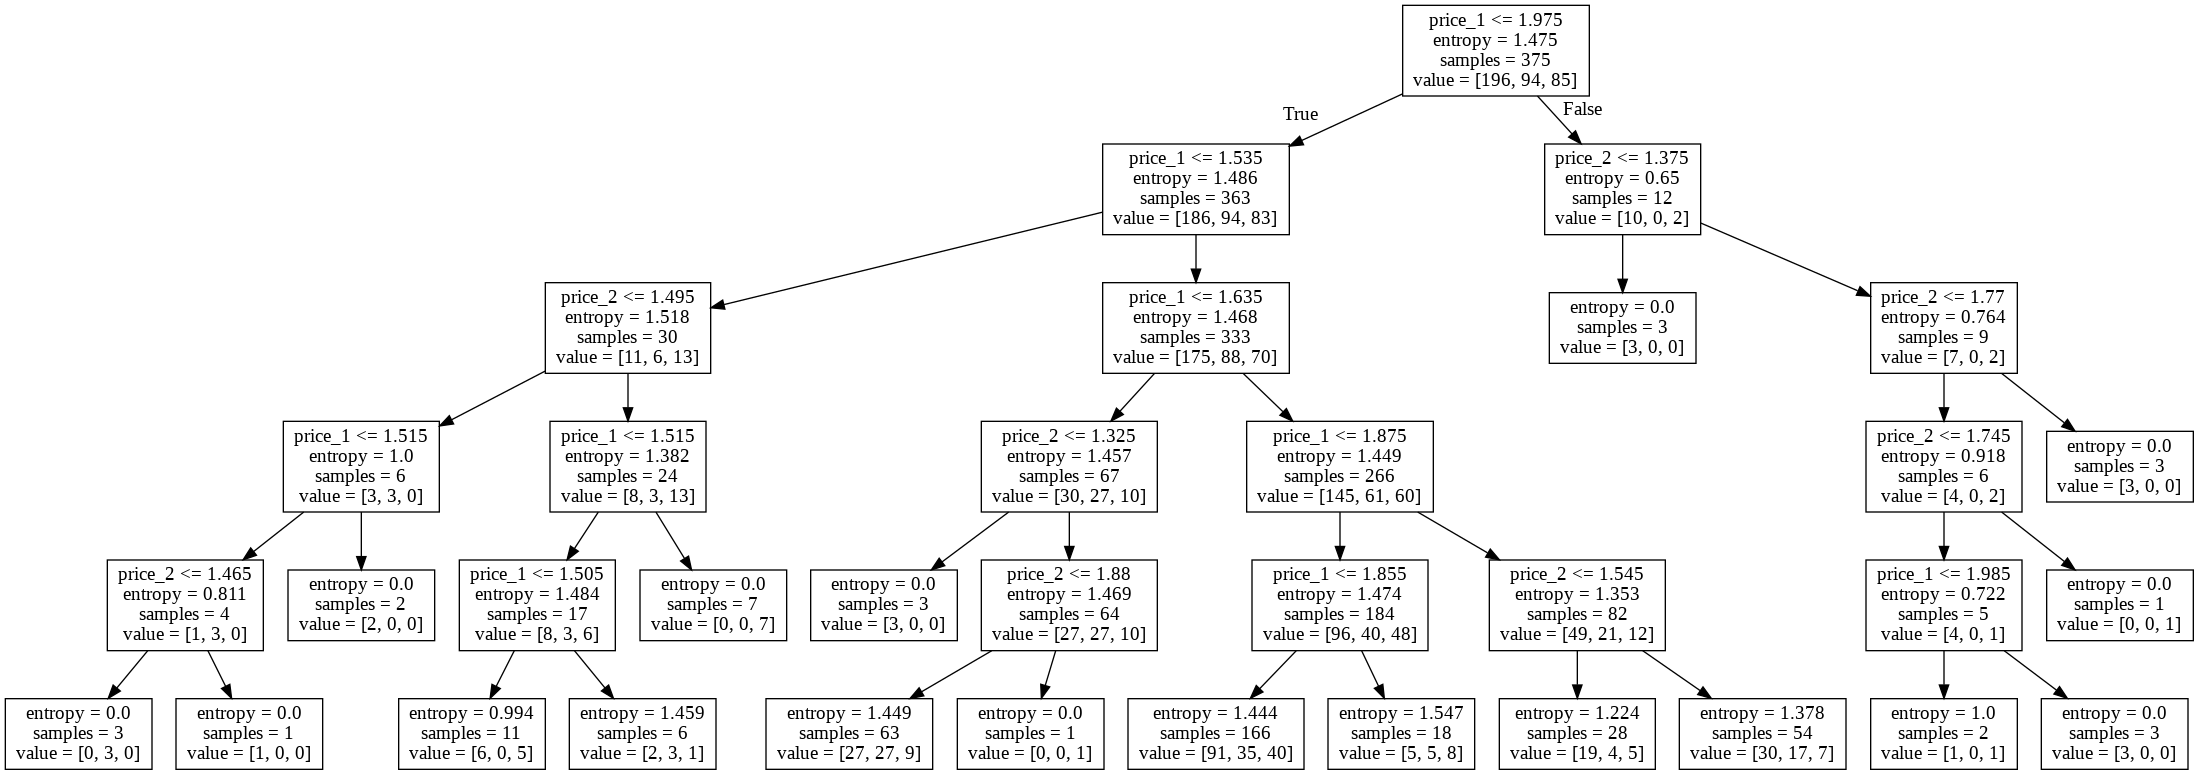

In [5]:
draw_decision_tree(model1)

# 예측결과를 확인하자

In [6]:

confusion_matrix(y, model1.predict(X))

array([[249,   4,   8],
       [112,   6,   8],
       [ 91,   1,  21]])

# 변수추가
두 개의 변수만 사용했으므로 예측력이 낮다. 이제 모든 특성변수를 사용하여 보자.


In [7]:
X=data[:,0:12]; y=data[:,ncol-1]-1;
feature_names = ['age', 'male=1', 'heavy=1', 'price_1', 'price_2', 'price_3', 'ad1', 'ad2', 'ad3', 'disp1', 'disp2', 'disp3']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)
print("훈련 세트 정확도: {:.3f}".format(model2.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model2.score(X_test, y_test)))


훈련 세트 정확도: 0.899
테스트 세트 정확도: 0.920


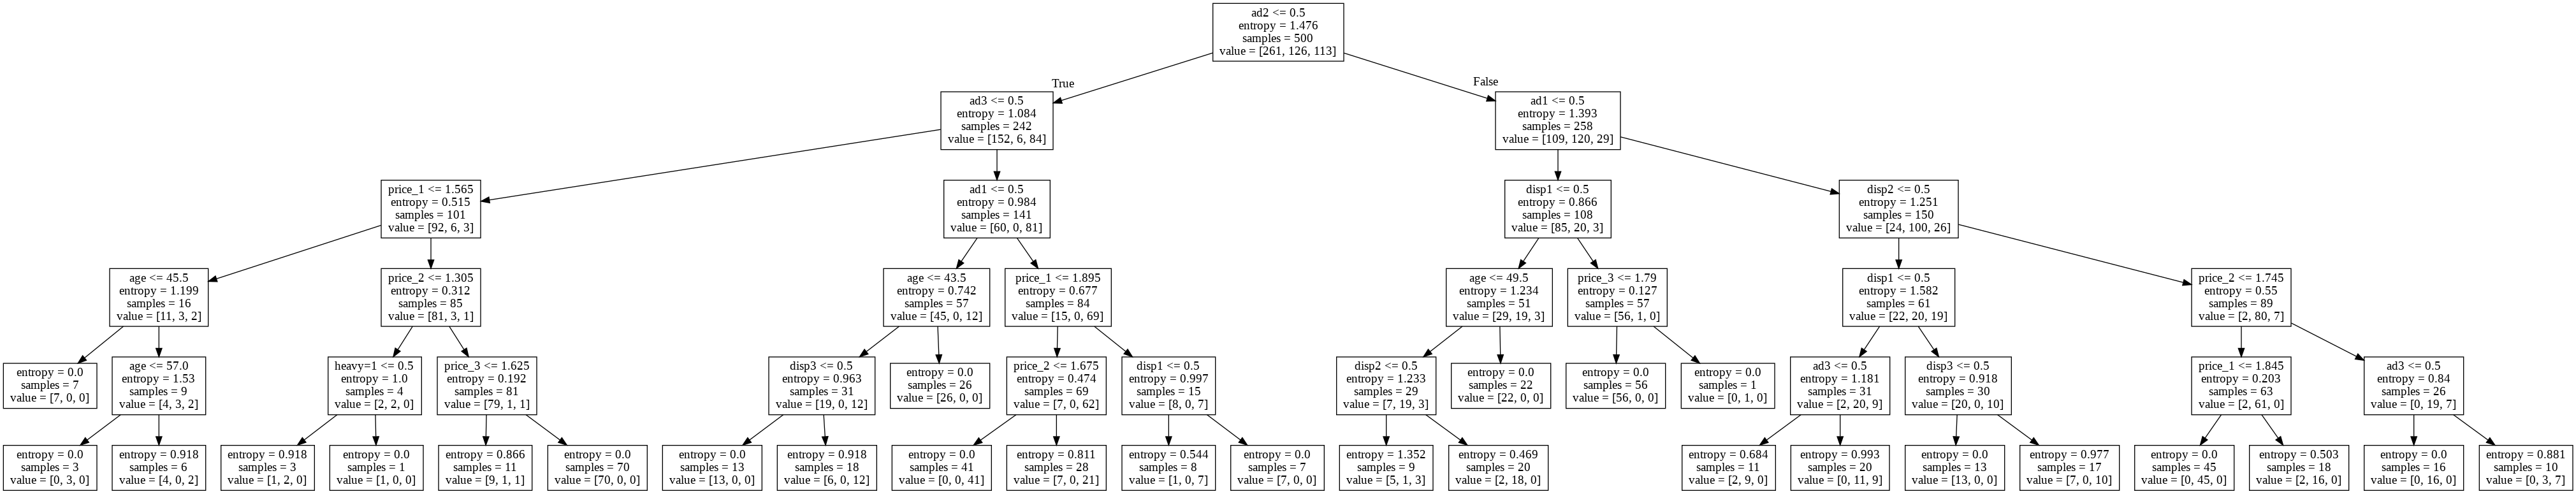

In [8]:
draw_decision_tree(model2)

# 정확도가 높아짐을 볼 수 있다.

In [9]:

print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93       261
         1.0       0.88      0.96      0.92       126
         2.0       0.80      0.87      0.83       113

    accuracy                           0.90       500
   macro avg       0.88      0.91      0.89       500
weighted avg       0.91      0.90      0.90       500



# 각 특성변수가 y의 클래스 분류에 미치는 영향력을 %로 표현하여 보자

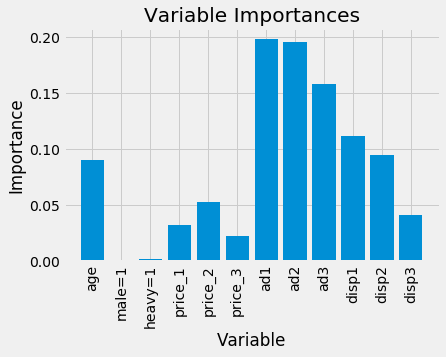

In [10]:
importances = list(model2.feature_importances_)
feature_list=feature_names
# Import matplotlib for plotting and use magic command for Jupyter Notebooks

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


# 학습모델로 예측하기

[[63.    0.    0.    1.75  1.3   1.73  1.    1.    1.    0.    1.    1.  ]
 [29.    1.    1.    1.65  1.43  1.66  1.    1.    1.    0.    0.    1.  ]
 [30.    1.    1.    1.62  1.53  1.76  0.    0.    0.    1.    0.    0.  ]]
브랜드 선택확률


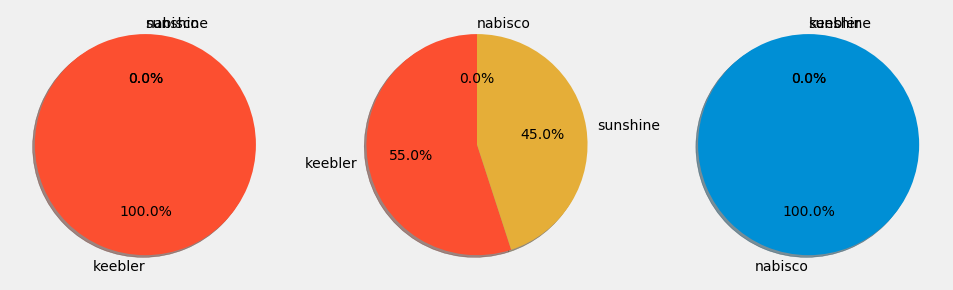

In [11]:
# 6. 예측하기 
x_new= X[0:3]; print(x_new); yhat = model2.predict_proba(x_new)
print('브랜드 선택확률')
plt.figure(figsize=(15,205))
for i in range(3) :
    ratio = yhat[i]; plt.subplot(1,3,i+1); plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.pie(ratio, labels=class_names, shadow=True, startangle=90, autopct='%0.1f%%')
plt.show()
## EOF